In [1]:
import sympy as sp
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import List
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

In [2]:
@dataclass
class Simulation():
    t: float = 0.0
    step: float = 1.0

    def take_step(self):
        NotImplemented
s = Simulation()
s.take_step()

In [31]:
@dataclass
class Body(Simulation):
    x: float = 0.0
    y: float = 0.0
    R: float = 1.0
    mass: float = 1.0
    v_x: float = 0.0
    v_y: float = 0.0
    F_x: float = 0.0
    F_y: float = 0.0
    c: str = 'b'

    def take_step(self):
        self.x = self.x + self.step * self.v_x + (
            0.5 * self.F_x / self.mass) * np.power(self.step, 2)
        self.y = self.y + self.step * self.v_y + (
            0.5 * self.F_y / self.mass) * np.power(self.step, 2)
        self.v_x = (self.F_x / self.mass) * self.step + self.v_x
        self.v_y = (self.F_y / self.mass) * self.step + self.v_y
        self.t += self.step
        
    #@property
    def distance(self, other):
        return np.sqrt(np.power(self.x - other.x, 2) + np.power(self.y - other.y, 2))
    
    def unit_xy(self, other):
        x = other.x - self.x
        y = other.y - self.y
        mag = np.sqrt(np.power(x, 2) + np.power(y, 2))
        return x / mag, y / mag

b = Body()
print(b)
b.take_step()
b

Body(t=0.0, step=1.0, x=0.0, y=0.0, R=1.0, mass=1.0, v_x=0.0, v_y=0.0, F_x=0.0, F_y=0.0, c='b')


Body(t=1.0, step=1.0, x=0.0, y=0.0, R=1.0, mass=1.0, v_x=0.0, v_y=0.0, F_x=0.0, F_y=0.0, c='b')

System(t=0.0, step=0.5, bodies=[Body(t=0.0, step=0.5, x=0.0, y=0.0, R=1.0, mass=1.0, v_x=0.0, v_y=0.0, F_x=0.0, F_y=0.0, c='b'), Body(t=0.0, step=0.5, x=0.75, y=0.0, R=1.0, mass=1.0, v_x=0.0, v_y=0.0, F_x=0.0, F_y=0.0, c='b')], G=1.0)
(1.0, 0.0)


c:\users\micha\.virtualenvs\main\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


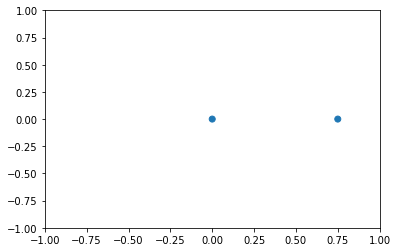

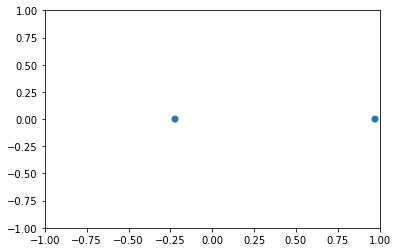

In [32]:
@dataclass
class System(Simulation):
    bodies: List[Body] = field(default_factory=list)
    t: float = 0.0
    G: float = 1.0

    def plot(self, xlim=[None, None], ylim=[None, None]):
        fig, ax = plt.subplots(1, 1)
        ax.scatter([b.x for b in self.bodies], [b.y for b in self.bodies],
                   linewidths=[b.R for b in self.bodies])
        ax.set_xlim(xlim[0], xlim[1])
        ax.set_ylim(ylim[0], ylim[1])
        fig.show()

    def take_step(self):
        for b in self.bodies:
            F_x = 0.0
            F_y = 0.0
            for other in self.bodies:
                if other is not b:
                    ux, uy = b.unit_xy(other)
                    F = -self.G * (b.mass * other.mass) / np.power(b.distance(other), 2)
                    F_x += F * ux
                    F_y += F * uy
            b.F_x, b.F_y = F_x, F_y
        for b in self.bodies:
            b.take_step()
        self.t = self.t + self.step
    
    def set_steps(self, step=None):
        if step:
            self.step = step
        for b in self.bodies:
            b.step = self.step

    def xy(self):
        return [b.x for b in self.bodies], [b.y for b in self.bodies]

s = System(bodies=[Body(), Body(x=0.75)])
s.set_steps(0.5)
print(s)
print(s.bodies[0].unit_xy(s.bodies[1]))
lims = {'xlim': [-1.0, 1.0], 'ylim': [-1.0, 1.0]}
s.plot(**lims)
s.take_step()
s.plot(**lims)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


System(t=0.0, step=3600, bodies=[Body(t=0.0, step=3600, x=0.0, y=0.0, R=10, mass=1.989e+30, v_x=0, v_y=0.0, F_x=0.0, F_y=0.0, c='y'), Body(t=0.0, step=3600, x=0, y=-149600000000.0, R=3, mass=5.972e+24, v_x=29780.0, v_y=0, F_x=0.0, F_y=0.0, c='b'), Body(t=0.0, step=3600, x=0, y=-149215600000.0, R=1, mass=7.347e+22, v_x=30802.0, v_y=0, F_x=0.0, F_y=0.0, c='gray'), Body(t=0.0, step=3600, x=0, y=-108000000000.0, R=2, mass=4.867e+24, v_x=35020.0, v_y=0, F_x=0.0, F_y=0.0, c='orange'), Body(t=0.0, step=3600, x=0, y=-230000000000.0, R=1, mass=6.417e+23, v_x=24000.0, v_y=0, F_x=0.0, F_y=0.0, c='r'), Body(t=0.0, step=3600, x=0, y=-55000000000.0, R=1, mass=3.3e+23, v_x=48000.0, v_y=0, F_x=0.0, F_y=0.0, c='r')], G=-6.6743e-11)
[0.0, 0, 0, 0, 0, 0]
[149600000000.0, 0.0, 384400000.0, 41600000000.0, -80400000000.0, 94600000000.0]
365 frames, 55 interval


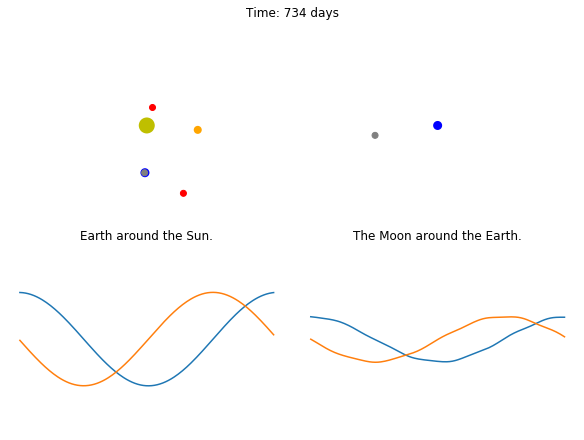

In [44]:
earth_speed = 29.78e3 # m/s
earth_distance = 149.6e9 # m
earth_mass = 5.972e24 # kg

sun_mass = 1.989e30 # kg

moon_mass = 7.347e22 # kg
moon_distance_to_earth = 3.844e8
moon_distance = -moon_distance_to_earth + earth_distance # m
moon_speed = 1.022e3 + earth_speed # m/s

venus_mass = 4.867e24 # kg
venus_distance = 108e9 # m
venus_speed = 35.02e3 # m/s

mars_mass = 6.417e23 # kg
mars_distance = 230e9 #m
mars_speed = 24.0e3 #m/s

mercury_mass = 3.30e23 # kg
mercury_distance = 55e9 # m, big guess due to eccentricity
mercury_speed = 48e3 # m/s


G = -6.67430e-11 # m^3kg^-1s^-2

s = System(bodies=[
    Body(mass=sun_mass, R=10, v_x=0, c='y'),
    Body(mass=earth_mass, x=0, y=-earth_distance, v_x=earth_speed, v_y=0, R=3, c='b'),
    Body(mass=moon_mass, x=0, y=-moon_distance, v_x=moon_speed, v_y=0, R=1, c='gray'),
    Body(mass=venus_mass, x=0, y=-venus_distance, v_x=venus_speed, v_y=0, R=2, c='orange'),
    Body(mass=mars_mass, x=0, y=-mars_distance, v_x=mars_speed, v_y=0, R=1, c='r'),
    Body(mass=mercury_mass, x=0, y=-mercury_distance, v_x=mercury_speed, v_y=0, R=1, c='r'),
],
           G=G)
s.set_steps(60 * 60)
print(s)

fig, ax = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)
ax_sun = ax[0][0]
ax_earth = ax[0][1]
ax_sun_xy = ax[1][0]
ax_earth_xy = ax[1][1]

ax_sun_xy.set_title('Earth around the Sun.')
ax_earth_xy.set_title('The Moon around the Earth.')
sun_T = int(365/2)
sun_x, sun_y = np.ones(sun_T), np.ones(sun_T)
sun_time = np.linspace(0, sun_T, sun_T)
earth_T = sun_T
earth_xP, earth_yP = np.ones(earth_T), np.ones(earth_T)
earth_time = np.linspace(0, earth_T, earth_T)

line_sun_x, = ax_sun_xy.plot(sun_time, sun_x)
line_sun_y, = ax_sun_xy.plot(sun_time, sun_y)

line_earth_x, = ax_earth_xy.plot(earth_time, earth_xP)
line_earth_y, = ax_earth_xy.plot(earth_time, earth_yP)


x, y = s.xy()
colors = [b.c for b in s.bodies]
line_sun = ax_sun.scatter(x, y, linewidths=[b.R for b in s.bodies], c=colors)

earth_x, earth_y = s.bodies[1].x, s.bodies[1].y
x_new = [xi - earth_x for xi in x]
y_new = [yi - earth_y for yi in y]
print(x_new)
print(y_new)

line_earth = ax_earth.scatter(x_new, y_new, linewidths=[b.R for b in s.bodies], c=colors)

vF_sun = 2
ax_sun.set_xlim([-vF_sun * earth_distance, vF_sun * earth_distance])
ax_sun.set_ylim([-vF_sun * earth_distance, vF_sun * earth_distance])

vF_earth = 4
ax_earth.set_xlim([-vF_earth * moon_distance_to_earth, vF_earth * moon_distance_to_earth])
ax_earth.set_ylim([-vF_earth * moon_distance_to_earth, vF_earth * moon_distance_to_earth])

ax_sun_xy.set_ylim([-vF_sun * earth_speed, vF_sun * earth_speed])
ax_earth_xy.set_ylim([-vF_earth * moon_speed, vF_earth * moon_speed])


ax_sun.axis('off')
ax_earth.axis('off')
ax_sun_xy.axis('off')
ax_earth_xy.axis('off')


fig.suptitle(f'Time: {int(s.t/60/60/24)} days')

interval = 55#75 / (10 / 2)  # milliseconds
T = 2000  # milliseconds
frame_N = 365*1#int(T / interval)
print(f'{frame_N} frames, {interval} interval')


def animate(i):
    for _ in range(24*2):
        s.take_step()
    x, y = s.xy()
    line_sun.set_offsets(np.transpose([x, y]))
    earth_x, earth_y = s.bodies[1].x, s.bodies[1].y
    x_new = [xi - earth_x for xi in x]
    y_new = [yi - earth_y for yi in y]
    line_earth.set_offsets(np.transpose([x_new, y_new]))
    
    sun_x[1:] = sun_x[:-1]; sun_x[0] = s.bodies[1].v_x
    line_sun_x.set_data(sun_time, sun_x)
    sun_y[1:] = sun_y[:-1]; sun_y[0] = s.bodies[1].v_y
    line_sun_y.set_data(sun_time, sun_y)
    
    earth_xP[1:] = earth_xP[:-1];earth_xP[0] = s.bodies[2].v_x
    line_earth_x.set_data(earth_time, earth_xP)
    earth_yP[1:] = earth_yP[:-1]; earth_yP[0] = s.bodies[2].v_y
    line_earth_y.set_data(earth_time, earth_yP)
    
    
    
    fig.suptitle(f'Time: {int(s.t/60/60/24)} days')
    return line_sun, line_earth, line_sun_x, line_sun_y, line_earth_x, line_earth_y,


anim = FuncAnimation(
    fig,
    animate,  #init_func=init,
    frames=frame_N,
    interval=interval)
anim.save('10_years_sun_venus_earth_moon_mars80dpi.gif', dpi=80, writer='imagemagick')
#h = anim.to_html5_video()
#HTML(h)

![gif](10_years_sun_venus_earth_moon_mars80dpi.gif)